### Project Brief

#### BART Background

BART started service in 1972 and has grown to service 50 station across five counties. It joins San Francisco International Airport, Oakland International Airport, with San Francisco Downtown, and Oakland Downtown. Currently, BART operates from 5am-12am. 

The following analysis is based on a single dataset, procured from Kaggle. Its author is BART. The data tracks the bart ticket scans as a rider travels a trip. The rider scans at their origin station, and once again, at their destination station. The data summarizes the total trips per hour per unique combination of origin and destination station. 

The data encapsulates all rider data from January 1st, 2011 to May 31st, 2023. 


# BART RIDERSHIP in the past twelve years

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

#### 2011-2024 Ridership

In [3]:
#example of data
csv2011 = pd.read_csv('date-hour-soo-dest-2011.csv')
csv2011.head(2)

Date  Hour Origin Station Destination Station  Trip Count
0  2011-01-01     0           12TH                12TH           1
1  2011-01-01     0           12TH                16TH           1

In [4]:
#EXPERIMENT Importing files in a loop, cleaning, and appending them. 
bart_summary_day = []
for i in list(range(2011,2024,1)):
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df['Week'] = df['Date'].dt.isocalendar().week
    # df['Day'] = df['Date'].dt.dayofweek
    bart_summary_day.append(df.groupby(['Year','Month Name','Month','Week','Date'])['Trip Count'].sum().reset_index())

In [5]:
ww = pd.concat(bart_summary_day).groupby(['Year','Week'])['Trip Count'].sum().reset_index().drop([646])
ww['Year'].value_counts()#.index[2011]
ww

Year  Week  Trip Count
0    2011     1     1845606
1    2011     2     1911246
2    2011     3     1840793
3    2011     4     2051979
4    2011     5     2025602
..    ...   ...         ...
641  2023    14      921323
642  2023    15      965379
643  2023    16      996239
644  2023    17      993611
645  2023    18      314524

[646 rows x 3 columns]

In [6]:
t_test = []
for i in range(2011,2023,1):
    t_statistic, p_value = stats.ttest_ind(
                    ww[(ww['Year'] == i)]['Trip Count'], 
                    ww[(ww['Year'] == i+1)]['Trip Count'], 
                    equal_var=True)
    var1 = np.var(ww[ww.Year == i]['Trip Count'], ddof=1)  # ddof=1 for unbiased estimator (N-1)
    var2 = np.var(ww[ww.Year == i+1]['Trip Count'], ddof=1)

# Calculate F-test statistic and p-value
    F_statistic = var1 / var2
    df1 = len(ww[ww.Year == 2011]) - 1
    df2 = len(ww[ww.Year == 2012]) - 1
    p_value_f = stats.f.cdf(F_statistic, len(ww[ww.Year == i]), len(ww[ww.Year == i+1]))
    
    int_list = [i, 
                i+1, F_statistic,
                p_value_f, t_statistic, p_value,
                # (t_statistic**2) / (t_statistic**2 + 52+52-2),
               ]
    t_test.append(int_list)
pd.DataFrame(t_test, columns = ('Sample 1','Sample 2',
                                'f_statistic','f_test pval',
                               't_statistic',
                                't_test pval', ))#.sort_values(by = 'Sample 1')

Sample 1  Sample 2  f_statistic   f_test pval  t_statistic   t_test pval
0       2011      2012     0.822629  2.419469e-01    -5.270009  7.644877e-07
1       2012      2013     0.260277  1.544132e-06    -0.545857  5.863564e-01
2       2013      2014     3.124765  9.999664e-01    -2.480651  1.475011e-02
3       2014      2015     0.319592  3.144645e-05    -0.455106  6.499911e-01
4       2015      2016     0.966502  4.508804e-01    -0.124894  9.008486e-01
5       2016      2017     2.928925  9.999217e-01     0.995491  3.218306e-01
6       2017      2018     0.736839  1.370437e-01     1.039965  3.008150e-01
7       2018      2019     0.970965  4.578998e-01     0.778011  4.383633e-01
8       2019      2020     0.118460  6.831620e-13    16.359362  2.110317e-30
9       2020      2021    18.368108  1.000000e+00     1.227460  2.224207e-01
10      2021      2022     1.399244  8.862570e-01   -11.319297  8.753150e-20
11      2022      2023     0.705620  1.632457e-01    -1.204567  2.325464e-01

In [7]:
ww = ww[(ww.Week > 1) & (ww.Week < 53)]

In [8]:
F, p = stats.f_oneway(ww[ww.Year == 2011]['Trip Count'], ww[ww.Year == 2012]['Trip Count'])
print('F ' + str(round(F,2)))
print('P ' + str(round(p,8)))

F 26.98
P 1.09e-06


In [9]:
var1 = np.var(ww[ww.Year == 2011]['Trip Count'], ddof=1)  # ddof=1 for unbiased estimator (N-1)
var2 = np.var(ww[ww.Year == 2012]['Trip Count'], ddof=1)

# Calculate F-test statistic and p-value
F_statistic = var1 / var2
df1 = len(ww[ww.Year == 2011]) - 1
df2 = len(ww[ww.Year == 2012]) - 1
p_value = stats.f.cdf(F_statistic, len(ww[ww.Year == 2012]), len(ww[ww.Year == 2011]))
print("F-statistic:", F_statistic)
print("p-value:", p_value)
len(ww[ww.Year == 2012]) - 1
var1 / var2

F-statistic: 0.807898813254329
p-value: 0.22444657058288772


0.807898813254329

In [10]:
#2011 vs 2016 T test
t_statistic, p_value = stats.ttest_ind(ww[ww['Year'] == 2011]['Trip Count'],
                ww[ww['Year'] == 2016].reset_index().drop([51,52])['Trip Count'],equal_var=True)
r_squared = (t_statistic**2) / (t_statistic**2 + 52 + 52 - 2)
print('2011v2016 r_squared ' + str(r_squared))
print('2011v2016 p_value ' + str(p_value))

KeyError: '[51, 52] not found in axis'

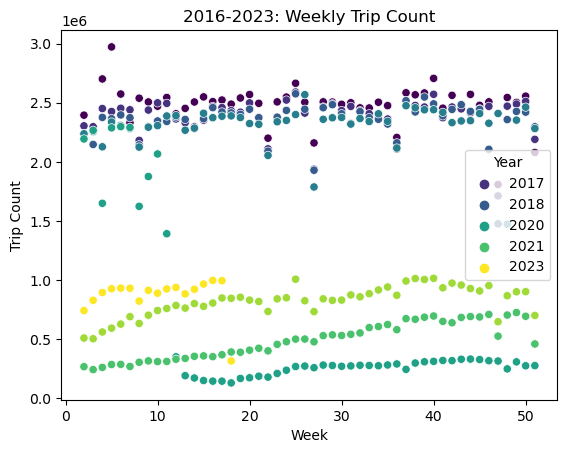

In [11]:
# ax = sns.scatterplot(data=ww[ww['Year']>2015], x="Week", y="Trip Count", hue='Year',palette="viridis")
ax = sns.scatterplot(data=ww[(ww['Year']>2015) & (ww['Week']<52) & (ww['Week']>1)], x="Week", y="Trip Count", hue='Year',palette="viridis")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# sns.move_legend(
#     ax, "lower center",
#     bbox_to_anchor=(.5, -.20), ncol=8, title=None, frameon=False,
# )
sns.move_legend(ax, "center right")
plt.title("2016-2023: Weekly Trip Count")
plt.savefig("images/2016_2023 Weekly.svg")

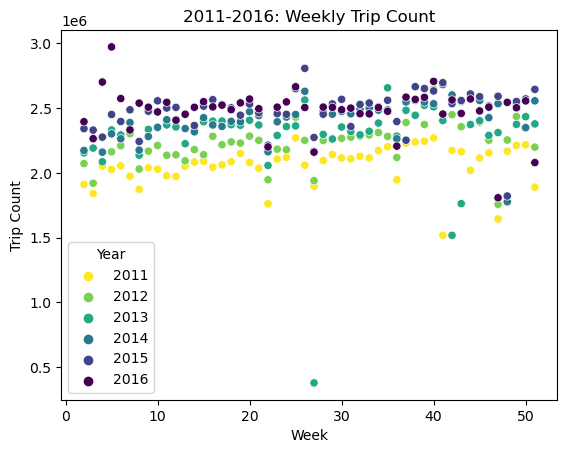

In [12]:
# ax = sns.scatterplot(data=ww[ww['Year']<2017], x="Week", y="Trip Count", hue='Year',palette="viridis_r")
ax = sns.scatterplot(data=ww[(ww['Year']<2017) & (ww['Week']<52) & (ww['Week']>1)] , 
                     x="Week", y="Trip Count", hue='Year',palette="viridis_r", legend = 'full')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# sns.move_legend(
#     ax, "lower center",
#     bbox_to_anchor=(.5, -.20), ncol=8, title=None, frameon=False,
# )
# sns.move_legend(ax, "lower right")
plt.title("2011-2016: Weekly Trip Count")
plt.savefig("images/2011-2016 Weekly.svg")

<Axes: ylabel='Density'>

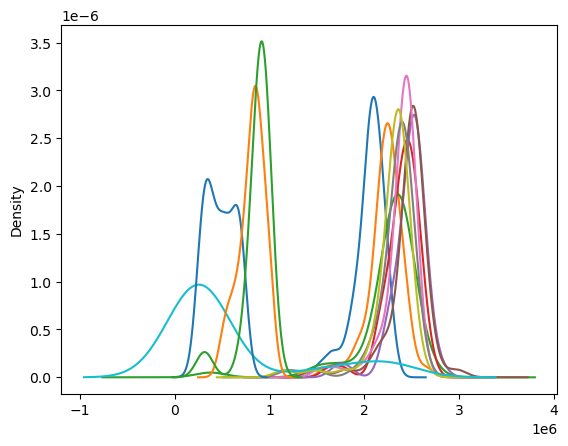

In [13]:
ww[(ww['Year'] == 2011)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2012)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2013)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2014)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2015)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2016)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2017)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2018)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2019)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2020)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2021)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2022)]['Trip Count'].plot.kde()
ww[(ww['Year'] == 2023)]['Trip Count'].plot.kde()

/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

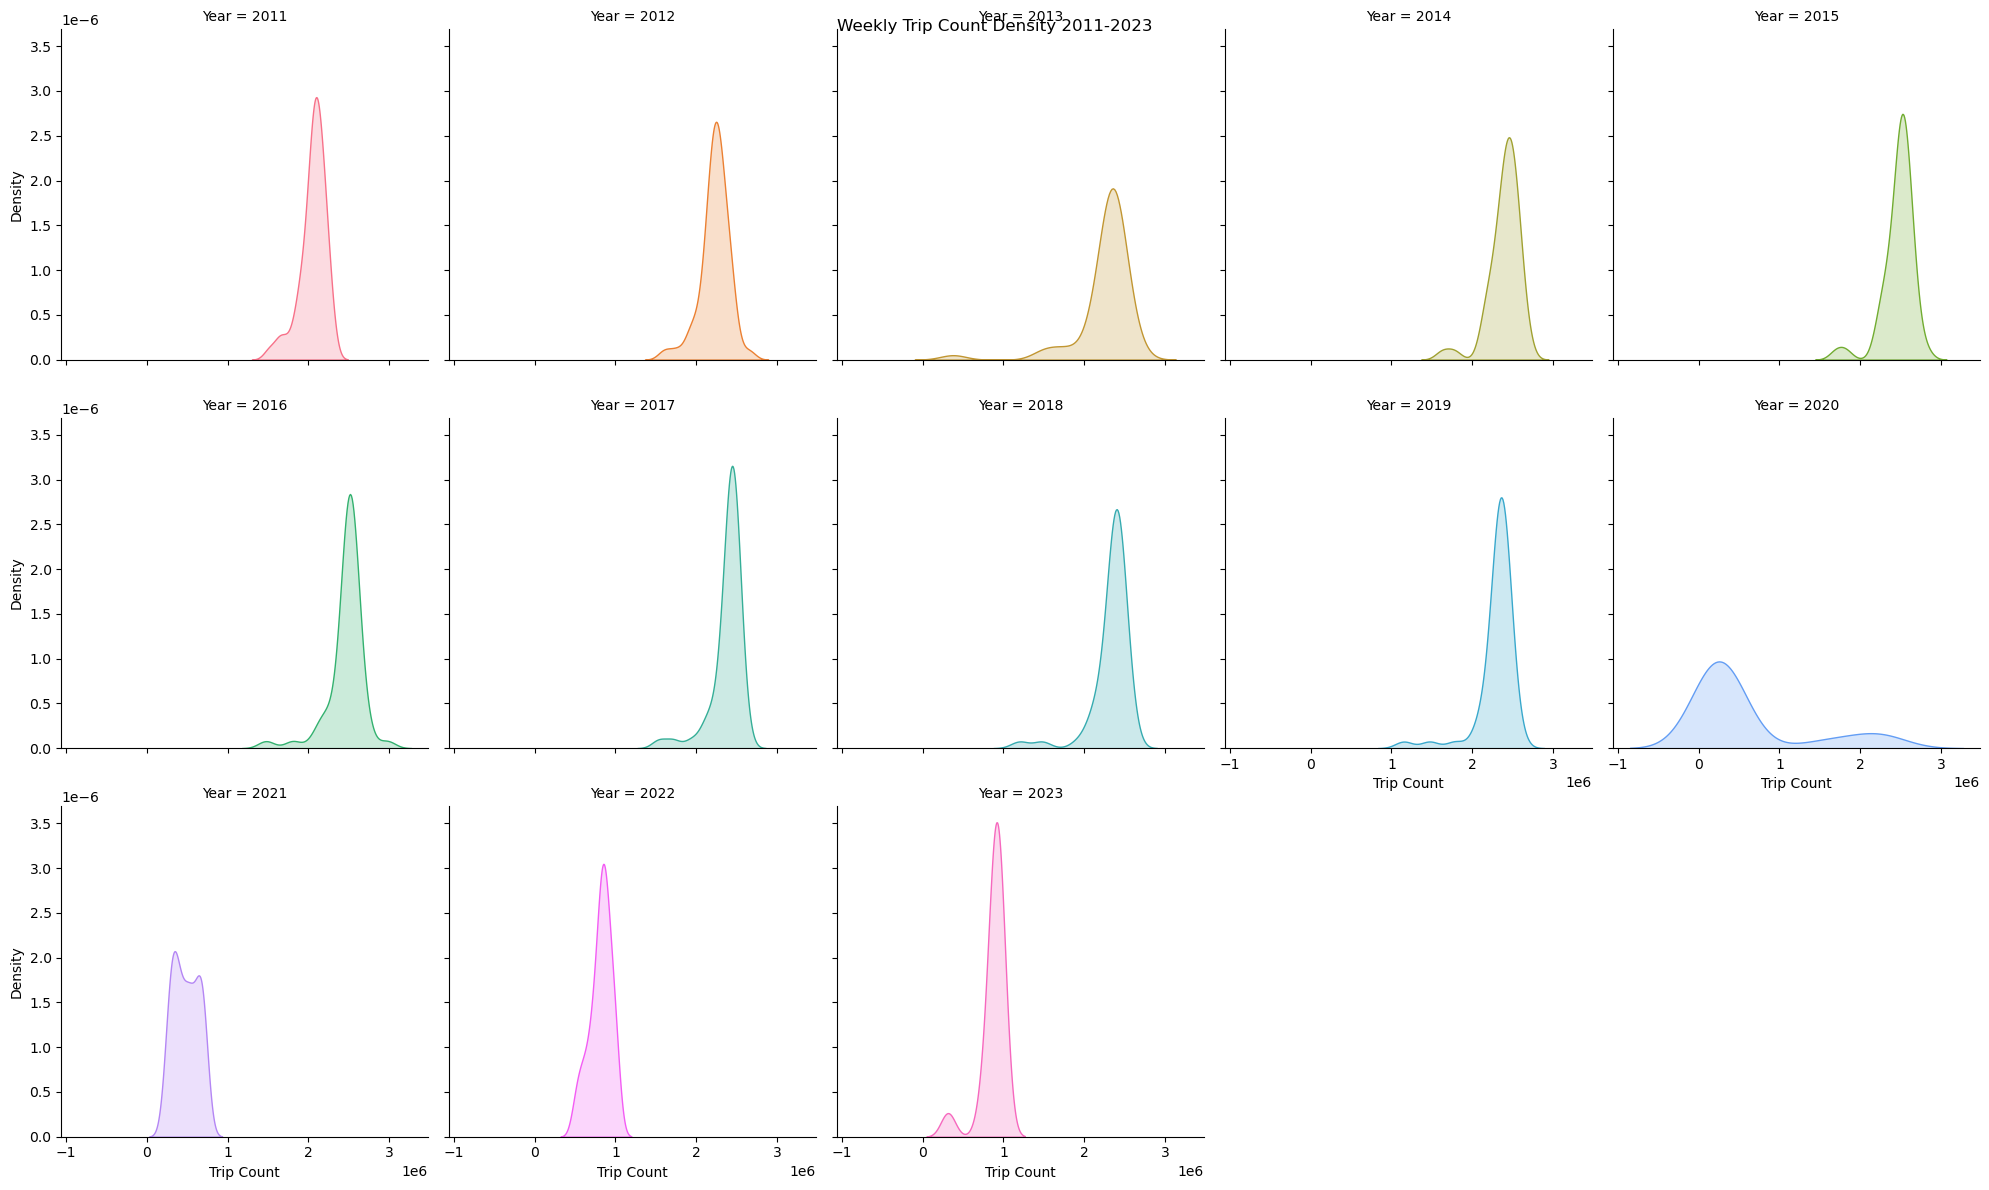

In [14]:
g = sns.FacetGrid(ww[(ww['Week']!=1) | (ww['Week']>52)], col="Year", col_wrap=5, height=4, hue = "Year")
g.map(sns.kdeplot, "Trip Count", fill=True)
g.fig.suptitle("Weekly Trip Count Density 2011-2023")
g.savefig("images/kde_grid.svg")

In [15]:
list(range(2011,2023,1))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [16]:
ww = pd.concat(bart_summary_day).groupby(['Year','Week'])['Trip Count'].sum().reset_index().drop([104])
ww[ww['Year'] == 2011]['Trip Count']
ww[ww['Year'] == 2012]['Trip Count']

t_statistic, p_value = stats.ttest_ind(ww[ww['Year'] == 2011]['Trip Count'],
                ww[ww['Year'] == 2012]['Trip Count'],equal_var=True)

# len(trips_month[trips_month.Year == 2011].groupby('Month')['Trip Count'].sum())
r_squared = (t_statistic**2) / (t_statistic**2 + 
                                len(ww[ww['Year'] == 2011]['Trip Count']) + 
                                len(ww[ww['Year'] == 2012]['Trip Count']) - 2)
r_squared
p_value

7.644877199305203e-07

In [17]:
ww = pd.concat(bart_summary_day).groupby(['Year','Date'])['Trip Count'].sum().reset_index()
ww[ww['Year'] == 2011]['Trip Count']

t_statistic, p_value = stats.ttest_ind(ww[ww['Year'] == 2011]['Trip Count'],
                ww[ww['Year'] == 2012]['Trip Count'],equal_var=True)

# len(trips_month[trips_month.Year == 2011].groupby('Month')['Trip Count'].sum())
r_squared = (t_statistic**2) / (t_statistic**2 + 
                                len(ww[ww['Year'] == 2011]['Trip Count']) + 
                                len(ww[ww['Year'] == 2012]['Trip Count']) - 2)
r_squared

0.013247443866357933

In [18]:
#Importing files in a loop, cleaning, and appending them. 
bart_summary = []
for i in list(range(2011,2024,1)):
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    bart_summary.append(df.groupby(['Year','Month Name','Month'])['Trip Count'].sum().reset_index())

In [19]:
#concat files
trips_month = pd.concat(bart_summary)[['Year','Month Name','Month','Trip Count']].groupby(
    ['Year','Month','Month Name'])['Trip Count'].sum().reset_index().sort_values(by=['Year','Month'])#.reset_index()
trips_month['Date'] = trips_month['Month Name'] + " " + trips_month['Year'].astype(str)

In [20]:
#Trimmed dataset Total Trips, Month, Year

trips_month = trips_month.drop([trips_month.shape[0]-1])
trips_month

Year  Month Month Name  Trip Count           Date
0    2011      1    January     8203563   January 2011
1    2011      2   February     7933264  February 2011
2    2011      3      March     9049039     March 2011
3    2011      4      April     8824840     April 2011
4    2011      5        May     8940380       May 2011
..    ...    ...        ...         ...            ...
143  2022     12   December     3403625  December 2022
144  2023      1    January     3417241   January 2023
145  2023      2   February     3581426  February 2023
146  2023      3      March     4116038     March 2023
147  2023      4      April     4022389     April 2023

[148 rows x 5 columns]

In [21]:
#Import the last of May2023 - April 2024

added_months = []
for k,v in {'May':'202305','June':'202306','July':'202307','August':'202308','September':'202309','October':'202310','November':'202311','December':'202312'}.items():
    tdf = pd.pandas.read_excel('ridership_2023/Ridership_' + v + '.xlsx', header = 1, index_col=0, sheet_name = 'Total Trips OD')
    date = dt.datetime.strptime(v, "%Y%m")
    temp_list = [2023, date.month, k, tdf.loc['Entries','Exits'], k + ' ' + str(date.year)]
    added_months.append(temp_list)
for k,v in {'January':'202401','February':'202402','March':'202403','April':'202404'}.items():
    tdf = pd.pandas.read_excel('ridership_2023/Ridership_' + v + '.xlsx', header = 1, index_col=0, sheet_name = 'Total Trips',skiprows=3)
    date = dt.datetime.strptime(v, "%Y%m")
    temp_list = [2024, date.month, k, tdf.loc['Grand Total','Unnamed: 51'], k + ' ' + str(date.year)]
    added_months.append(temp_list)
added_months = pd.DataFrame(added_months, columns = ['Year', 'Month', 'Month Name', 'Trip Count', 'Date'])
added_months


Year  Month Month Name  Trip Count            Date
0   2023      5        May     4133709        May 2023
1   2023      6       June     4159215       June 2023
2   2023      7       July     3916452       July 2023
3   2023      8     August     4477455     August 2023
4   2023      9  September     4202723  September 2023
5   2023     10    October     4432027    October 2023
6   2023     11   November     3980362   November 2023
7   2023     12   December     3625983   December 2023
8   2024      1    January     3844643    January 2024
9   2024      2   February     3917031   February 2024
10  2024      3      March     4169897      March 2024
11  2024      4      April     4223784      April 2024

In [22]:
#Combine all data
trips_month = pd.concat([trips_month,added_months])
trips_month.tail(2)

Year  Month Month Name  Trip Count        Date
10  2024      3      March     4169897  March 2024
11  2024      4      April     4223784  April 2024

In [23]:
#Added Stats pre-2020
pre2020_mean = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['mean']
pre2020_std = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['std']
total_2019 = trips_month[trips_month['Year']==2019].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2020 = trips_month[trips_month['Year']==2020].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2021 = trips_month[trips_month['Year']==2021].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2016 = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['max']
total_2022 = trips_month[trips_month['Year']==2022].groupby('Year')['Trip Count'].sum().describe().loc['mean']


print(bool(pre2020_mean-pre2020_std-total_2019 > 0)) #2019 within 1 std of the 2011-2019 sample. 
print('pre2020_mean ', str(pre2020_mean), '\npre2020_std ', str(pre2020_std),'\ntotal_2019 ',str(total_2019),
      '\ntotal_2020 ', str(total_2020),'\ntotal_2021 ',str(total_2021), '\n2021 / pre-2020 mean ', str(total_2021/pre2020_mean*100),
     '\n2021 by 2016(max)',str(total_2021/total_2016*100), '\ntotal_2016', str(total_2016), 
      '\n2019/2016',str((total_2016-total_2019)/total_2016), '\ntotal_2022', str(total_2022), 
      '\n2022/pre-2020 mean ', str(total_2022/pre2020_mean)
      )

False
pre2020_mean  120096302.77777778 
pre2020_std  6788835.11773612 
total_2019  118609605.0 
total_2020  31426279.0 
total_2021  24964402.0 
2021 / pre-2020 mean  20.786986295650838 
2021 by 2016(max) 19.471750765728462 
total_2016 128208307.0 
2019/2016 0.07486801927740923 
total_2022 41986747.0 
2022/pre-2020 mean  0.3496089890268386


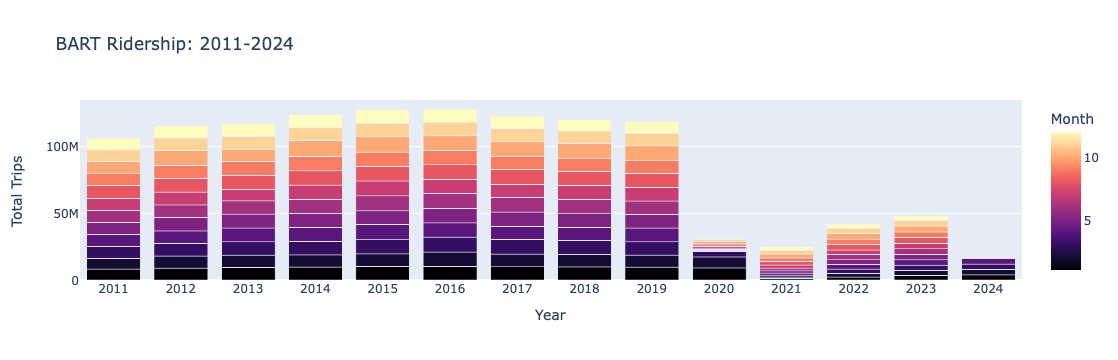

In [24]:
#Visualization: Bart 2011-2023 by Year (Months as colors)
trend = px.bar(trips_month, x='Year', 
             y='Trip Count', color = "Month", 
             labels={"Trip Count":"Total Trips"}, 
             title = "BART Ridership: 2011-2024",
             color_continuous_scale="Magma",
               
            )
trend.update_xaxes(type = 'category')
trend.show()
trend.write_image("images/2011_2023.png")
trend.write_image("images/2011_2023.svg")

In [25]:
#Significant changes to ridership (P Values)
p_val = []
for i in range(trips_month['Year'].value_counts().index.shape[0]-1):
    int_list = [stats.ttest_ind(
                    a=trips_month[trips_month['Year'] == trips_month['Year'].value_counts().index[i]]['Trip Count'], 
                    b=trips_month[trips_month['Year'] == trips_month['Year'].value_counts().index[i+1]]['Trip Count'], 
                    equal_var=True)[1].round(2),
                trips_month['Year'].value_counts().index[i], 
                trips_month['Year'].value_counts().index[i+1],
               trips_month.groupby(['Year','Month'])['Trip Count'].sum().groupby(['Year']).mean().round().iloc[i+1]]
    p_val.append(int_list)
pd.DataFrame(p_val, columns = ('p_value', 'Year_1','Year_2', 'Month Avg Yr2'))

p_value  Year_1  Year_2  Month Avg Yr2
0      0.00    2011    2012      9620455.0
1      0.63    2012    2013      9747386.0
2      0.04    2013    2014     10337743.0
3      0.24    2014    2015     10646746.0
4      0.86    2015    2016     10684026.0
5      0.04    2016    2017     10239922.0
6      0.45    2017    2018     10043220.0
7      0.55    2018    2019      9884134.0
8      0.00    2019    2020      2618857.0
9      0.55    2020    2021      2080367.0
10     0.00    2021    2022      3498896.0
11     0.02    2022    2023      4005418.0
12     0.85    2023    2024      4038839.0

In [ ]:
dir(stats.ttest_ind)

In [26]:
# Avg monthly ridership by year
trips_month.groupby(['Year','Month'])['Trip Count'].sum().groupby(['Year']).mean()#.round().iloc[0]

Year
2011    8.868596e+06
2012    9.620455e+06
2013    9.747386e+06
2014    1.033774e+07
2015    1.064675e+07
2016    1.068403e+07
2017    1.023992e+07
2018    1.004322e+07
2019    9.884134e+06
2020    2.618857e+06
2021    2.080367e+06
2022    3.498896e+06
2023    4.005418e+06
2024    4.038839e+06
Name: Trip Count, dtype: float64

In [27]:
#Post 2020 growth regression

from sklearn.linear_model import LinearRegression
growth_2020ols = LinearRegression()
growth_2020ols.fit(growth_2020[['Year']],growth_2020['Trip Count'])
print('intercept' + str(growth_2020ols.intercept_))
print('slope' + str(growth_2020ols.coef_[0]))
# growth_2020[['Year']]

growth_2020ols.intercept_ + growth_2020ols.coef_[0]*2023

NameError: name 'growth_2020' is not defined

-47148403.33077398
[3.03425307e-11]


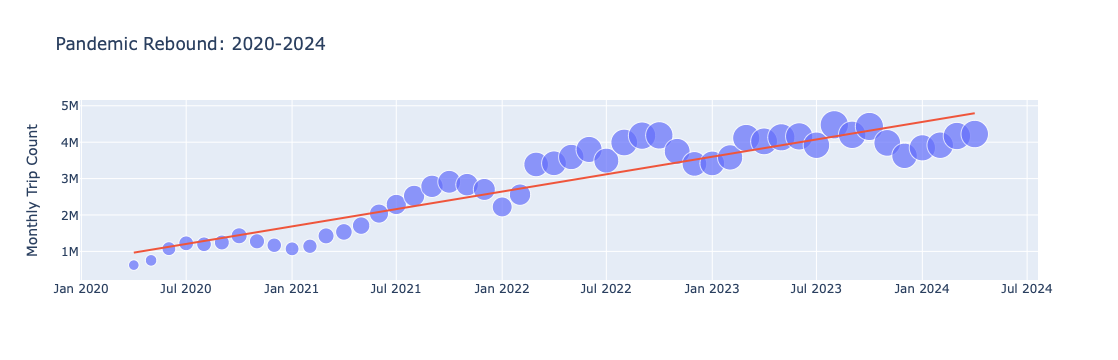

In [28]:
#Pandemic Rebound 
trips_month['Datetime']= trips_month['Year'].astype(str) + trips_month['Month'].astype(str)
trips_month['Datetime'] = pd.to_datetime(trips_month['Datetime'], format = '%Y%m')
trips_month[trips_month['Datetime'] > '2020-03-01'].head(2)
reg = trips_month[trips_month['Datetime'] > '2020-03-01']
regols = LinearRegression()
regols.fit(reg[['Datetime']],reg['Trip Count'])
print(regols.intercept_)
print(regols.coef_)
reg
reg_scat = px.scatter(reg,
                         x="Datetime", 
                         y="Trip Count",
                         labels={"Datetime":"","Trip Count":"Monthly Trip Count"},
                         trendline="ols", trendline_scope="overall",
                      size = 'Trip Count',
                         title = "Pandemic Rebound: 2020-2024")
reg_scat.update_layout(showlegend=False)
reg_scat.show()
reg_scat.write_image("images/reg_scat.png")
reg_scat.write_image("images/reg_scat.svg")

-47148403.33077398
[3.03425307e-11]


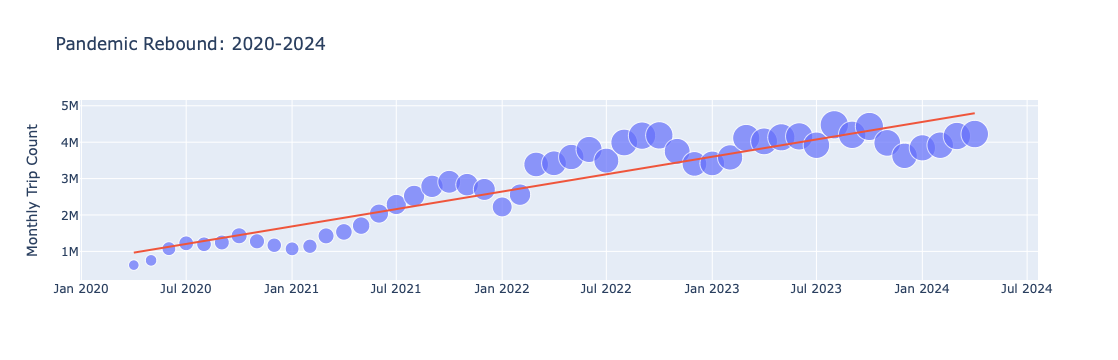

In [29]:
#Pandemic Rebound 
trips_month['Datetime']= trips_month['Year'].astype(str) + trips_month['Month'].astype(str)
trips_month['Datetime'] = pd.to_datetime(trips_month['Datetime'], format = '%Y%m')
trips_month[trips_month['Datetime'] > '2020-03-01'].head(2)
reg = trips_month[trips_month['Datetime'] > '2020-03-01']
regols = LinearRegression()
regols.fit(reg[['Datetime']],reg['Trip Count'])
print(regols.intercept_)
print(regols.coef_)
reg
reg_scat = px.scatter(reg,
                         x="Datetime", 
                         y="Trip Count",
                         labels={"Datetime":"","Trip Count":"Monthly Trip Count"},
                         trendline="ols", trendline_scope="overall",
                      size = 'Trip Count',
                         title = "Pandemic Rebound: 2020-2024")
reg_scat.update_layout(showlegend=False)
reg_scat.show()
reg_scat.write_image("images/reg_scat.png")
reg_scat.write_image("images/reg_scat.svg")

In [30]:
#Avg Monthly Growth per Year regression line
(3118053 - 2653544)*2

929018

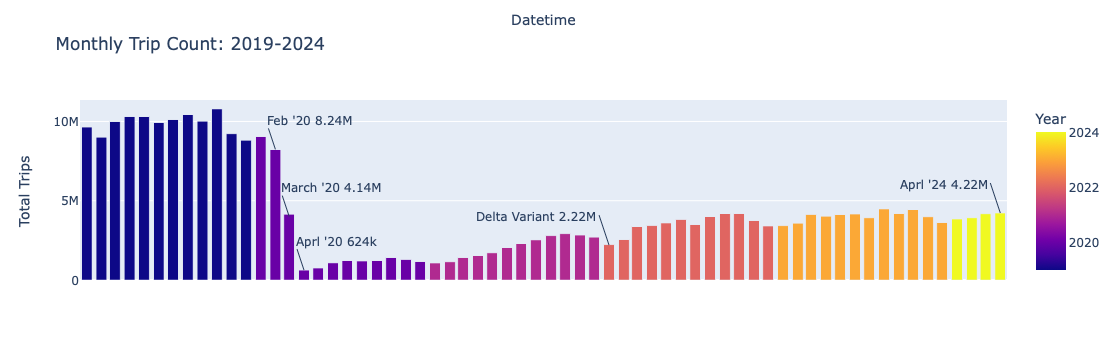

In [31]:
# Visualization: Bart 2019-2023 by Month

month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Datetime",
             y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
             title = "Monthly Trip Count: 2019-2024", color = 'Year',
              )

month.update_xaxes(showticklabels=False)
month.add_annotation(
    x="2020-03-01", y = 4000000,
    text="March '20 4.14M",
    showarrow=True,
    xanchor="left")
month.add_annotation(
    x="2020-02-01", y = 8240000,
    text="Feb '20 8.24M",
    showarrow=True,
    xanchor="left")
month.add_annotation(
    x="2022-01-01", y = 2200000,
    text="Delta Variant 2.22M",
    showarrow=True,
    xanchor="right")
month.add_annotation(
    x="2020-04-01", y = 624000,
    text="Aprl '20 624k",
    showarrow=True,
    xanchor="left")
month.add_annotation(
    x="2024-04-01", y = 4223784,
    text="Aprl '24 4.22M",
    showarrow=True,
    xanchor="right")
month.show()
month.write_html("images/covid_drop.html")
month.write_image("images/covid_drop.png")
month.write_image("images/covid_drop.svg")

In [32]:
#April 2020 - Dec 2020 agg
print('Apr-Dec 2020 Total Trips ' + str(trips_month[(trips_month['Year'] == 2020) & (trips_month['Month'] > 3)]['Trip Count'].sum()))
print('Apr 2020 as a percent of Apr 2019 ' + str(trips_month[(trips_month['Year'] == 2020) & (
    trips_month['Month'] == 4)]['Trip Count'].iloc[0]/trips_month[(trips_month['Year'] == 2019) & (
    trips_month['Month'] == 4)]['Trip Count'].iloc[0]))
print('Avg monthly trip coutn in 2019 ' + str(trips_month[(trips_month['Year'] == 2019)]['Trip Count'].mean()))
print('Aprl 2024 ' + str(trips_month[(trips_month['Year'] == 2024) & (trips_month['Month'] == 4)]['Trip Count'].sum()))
print('Jan 2022 ' + str(trips_month[(trips_month['Year'] == 2022) & (trips_month['Month'] == 1)]['Trip Count'].sum()))

Apr-Dec 2020 Total Trips 9986282
Apr 2020 as a percent of Apr 2019 0.06040684314747082
Avg monthly trip coutn in 2019 9884133.75
Aprl 2024 4223784
Jan 2022 2220863


### Downtown Daily

In [33]:
# SF func def
SF_stations = ['EMBR','MONT','POWL','CIVC','16TH','24TH','GLEN','BALB','DALY','COLM','SSAN','SBRN','SFIA','MLBR']

def SF(x):
    '''
    Simple function to seprate stations in SF = 1, and Not in SF = 0
    '''
    if x in SF_stations:
        return 1
    else:
        return 0

In [34]:
#Pull data for stations with origin or destination as SF downtown

SF_downton = ['EMBR','MONT','POWL','CIVC']
downtown_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day_name()
    df['Day Num'] = df['Date'].dt.dayofweek
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df = df[(df['Origin Station'].isin(SF_downton)) | (df['Destination Station'].isin(SF_downton))]
    df['Commute'] = df['Hour'].apply(lambda x: 'AM' if 4 < x <13 else 'PM')
    df['Origin_SF'] = df['Origin Station'].apply(SF)
    df['Destination_SF'] = df['Destination Station'].apply(SF)
    df['Transbay'] = df['Origin_SF'] + df['Destination_SF']
    df['Transbay'] = df['Transbay'].apply(lambda x: 'Y' if x == 1 else 'N')
    downtown_summary.append(df)

In [35]:
#concat to create DF: 
downtown_master = pd.concat([downtown_summary[0],downtown_summary[1][downtown_summary[1]['Month']>4], 
                             downtown_summary[2][downtown_summary[2]['Month']<5]])
downtown_master.loc[downtown_master['Year'].isin([2022,2023]),'Year']= '2022'
downtown_master.loc[downtown_master['Year']== 2019,'Year'] = '2019'
downtown_master.head(2)

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_28658/3886764646.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2022' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



Date  Hour Origin Station Destination Station  Trip Count  Month  \
4  2019-01-01     0           12TH                CIVC           2      1   
10 2019-01-01     0           12TH                EMBR           7      1   

        Day  Day Num Month Name  Year Commute  Origin_SF  Destination_SF  \
4   Tuesday        1    January  2019      PM          0               1   
10  Tuesday        1    January  2019      PM          0               1   

   Transbay  
4         Y  
10        Y

In [36]:
# Pivoting data
mont2 = downtown_master[((downtown_master['Destination Station']=='MONT') 
                 | (downtown_master['Origin Station']=='MONT')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
mont2['Station'] = 'MONT'
pow2 = downtown_master[((downtown_master['Destination Station']=='POWL') 
                 | (downtown_master['Origin Station']=='POWL')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
pow2['Station'] = 'POWL'
emb2 = downtown_master[((downtown_master['Destination Station']=='EMBR') 
                 | (downtown_master['Origin Station']=='EMBR')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
emb2['Station'] = 'EMBR'
civ2 = downtown_master[((downtown_master['Destination Station']=='CIVC') 
                 | (downtown_master['Origin Station']=='CIVC')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
civ2['Station'] = 'CIVC'
all2 = pd.concat([mont2,pow2,emb2,civ2])
all2.head(2)

Year     Day  Hour  Trip Count Station
0  2019  Friday     0  309.826923    MONT
1  2019  Friday     1   75.250000    MONT

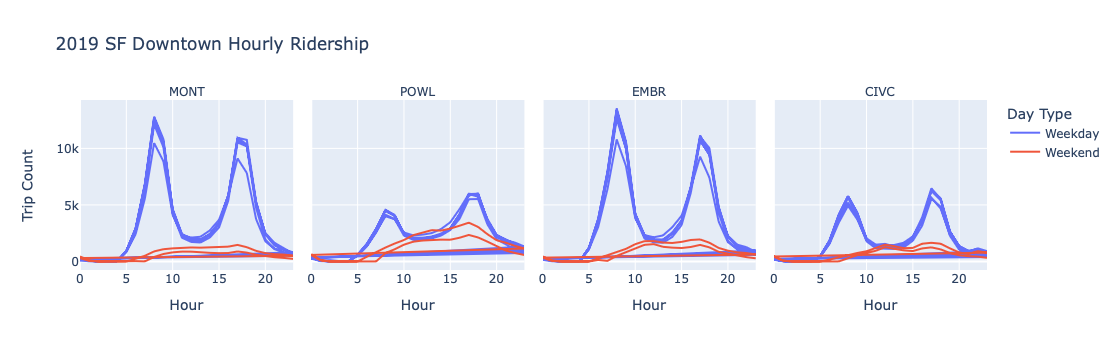

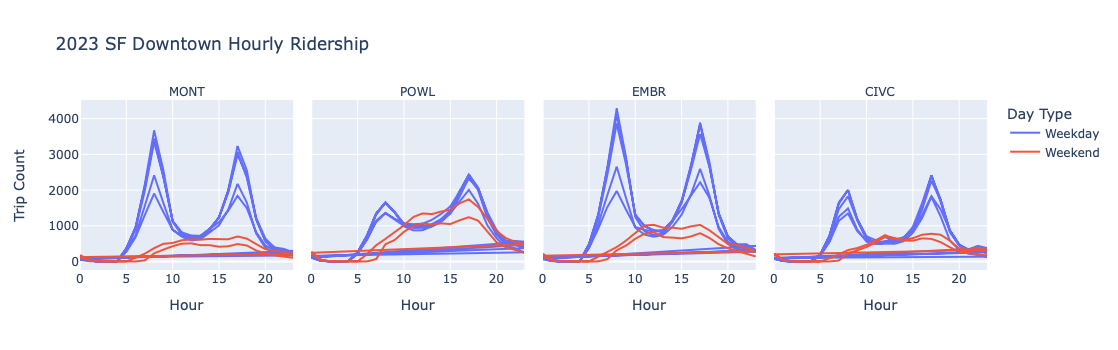

In [37]:
all2['Day Type'] = 'Weekday'
all2.loc[all2['Day'].isin(['Saturday','Sunday']),'Day Type'] = 'Weekend'
all2[all2['Day']=='Sunday']
all_line2019 = px.line(all2[all2['Year']=='2019'], x="Hour", y="Trip Count", color='Day Type', 
                    facet_col = 'Station', title = "2019 SF Downtown Hourly Ridership",width=900, height=350)
all_line2019.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# all_line2019.update_layout(showlegend = False)
all_line2019.show()
all_line2019.write_image("images/all_line2019_wk.png")
all_line2019.write_html("images/all_line2019_wk.html")
all_line2019.write_image("images/all_line2019_wk.svg")
all_line2023 = px.line(all2[all2['Year']=='2022'], x="Hour", y="Trip Count", color='Day Type', 
                    facet_col = 'Station', title = "2023 SF Downtown Hourly Ridership",width=900, height=350)
all_line2023.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# all_line2023.update_layout(showlegend = False)
all_line2023.show()
all_line2023.write_image("images/all_line2022_wk.png")
all_line2023.write_html("images/all_line2022_wk.html")
all_line2023.write_image("images/all_line2022_wk.svg")

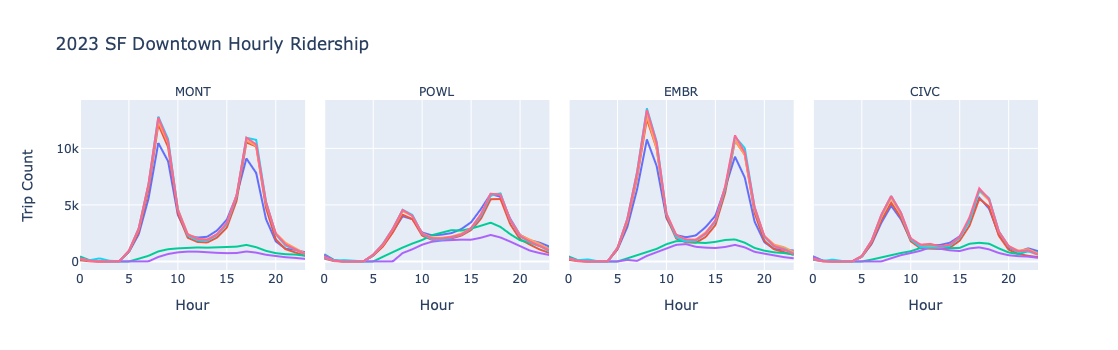

In [346]:
#2019, station, hour, avg trips per hour, SF Downtown
all_line2019 = px.line(all2[all2['Year']=='2019'], x="Hour", y="Trip Count", color='Day', 
                    facet_col = 'Station', title = "2023 SF Downtown Hourly Ridership",width=900, height=350)
all_line2019.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
all_line2019.update_layout(showlegend = False)
all_line2019.show()
all_line2019.write_image("images/all_line2019.png")
all_line2019.write_html("images/all_line2019.html")
all_line2019.write_image("images/all_line2019.svg")

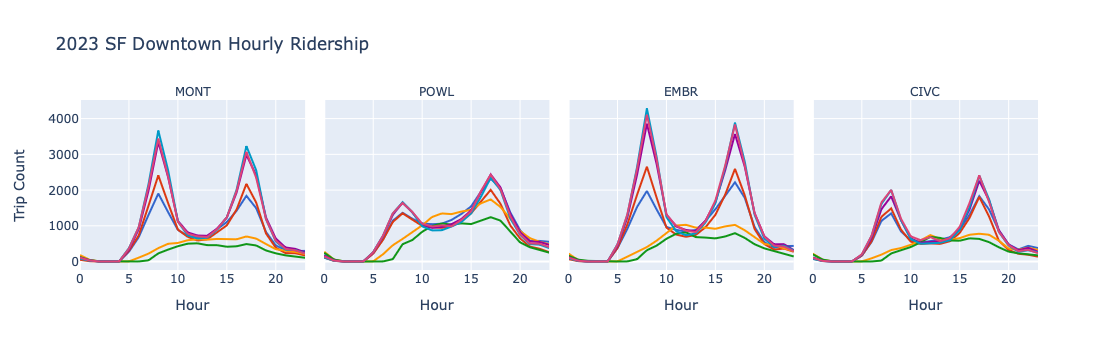

In [39]:
#2022, station, hour, avg trips per hour, SF Downtown
all_line2022 = px.line(all2[all2['Year']=='2022'], x="Hour", y="Trip Count", 
                    color='Day', color_discrete_sequence=px.colors.qualitative.G10, facet_col = 'Station', 
                       title = "2023 SF Downtown Hourly Ridership",width=900, height=350)
all_line2022.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
all_line2022.update_layout(showlegend = False)
all_line2022.show()
all_line2022.write_image("images/all_line2022.png")
all_line2022.write_html("images/all_line2022.html")
all_line2022.write_image("images/all_line2022.svg")

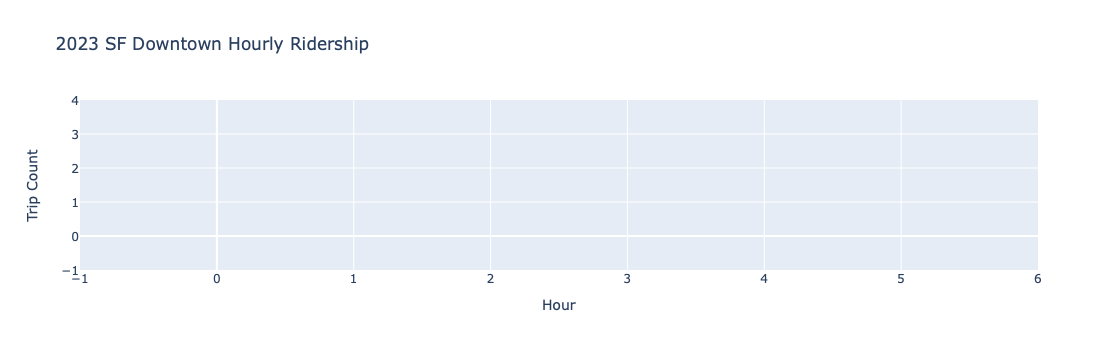

In [371]:
all_line2022 = px.line(all2[(all2['Year']=='2022') & all2['Station']=='MONT'], x="Hour", y="Trip Count", 
                    color='Day', color_discrete_sequence=px.colors.qualitative.G10, 
                       title = "2023 SF Downtown Hourly Ridership",width=900, height=350)
all_line2022.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
all_line2022.update_layout(showlegend = False)
all_line2022.show()
# all_line2022.write_image("images/all_line2022.png")
# all_line2022.write_html("images/all_line2022.html")
# all_line2022.write_image("images/all_line2022.svg")

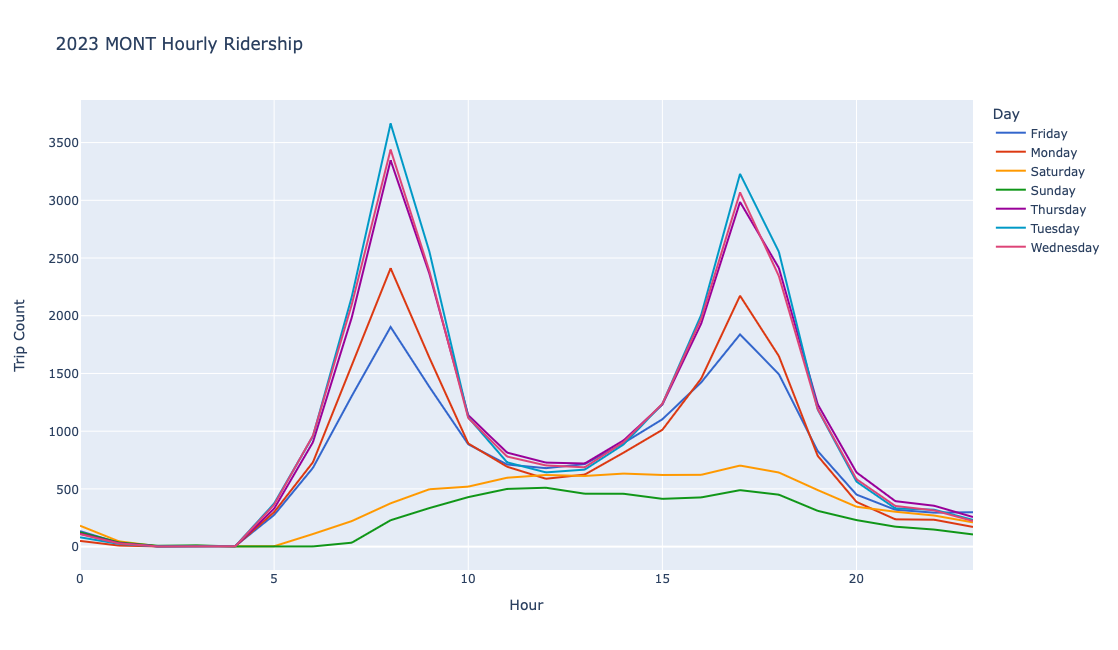

In [379]:
mont_line2023 = px.line(all2[(all2['Year']=='2022') & (all2['Station']=='MONT')], x="Hour", y="Trip Count", 
                    color='Day', color_discrete_sequence=px.colors.qualitative.G10, 
                       title = "2023 MONT Hourly Ridership",width=900, height=650)
mont_line2023.show()
mont_line2023.write_image("images/mont_line2023.png")
mont_line2023.write_html("images/mont_line2023.html")
mont_line2023.write_image("images/mont_line2023.svg")

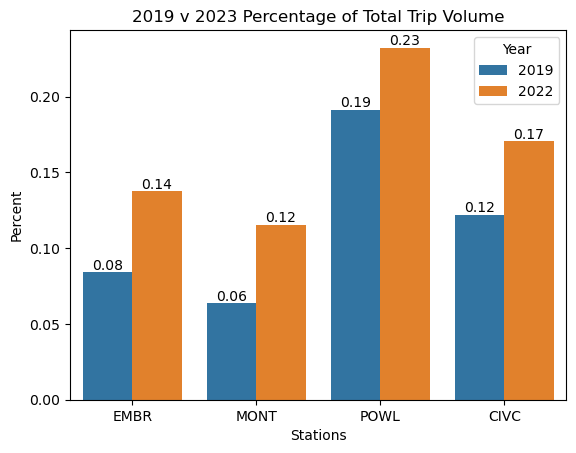

In [86]:
#Weekend percentage of total volume
day_2022_2019 = (all2.groupby(['Year','Station','Day'])['Trip Count'].sum()/\
all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index().groupby(['Year','Station'])['Trip Count'].sum()).reset_index()
day_2022_2019[day_2022_2019['Day'].isin(['Saturday','Sunday'])].groupby(['Year','Station'])['Trip Count'].sum().reset_index()
ax = sns.barplot(day_2022_2019[day_2022_2019['Day'].isin(['Saturday','Sunday'])].groupby(['Year','Station'])['Trip Count'].sum().reset_index(), 
            x = 'Station', y = 'Trip Count', hue = 'Year', order = ['EMBR','MONT','POWL','CIVC'])
ax.bar_label(ax.containers[1], fontsize=10, fmt = '%.2f')
ax.bar_label(ax.containers[0], fontsize=10, fmt = '%.2f')
plt.title('2019 v 2023 Percentage of Total Trip Volume')
plt.xlabel('2019 v 2023 Percentage Weekend of Total Trip Volume')
ax.set(xlabel='Stations', ylabel='Percent')
plt.savefig("images/19v23_dt_weekend.svg")
plt.savefig("images/19v23_dr_weekend.png")


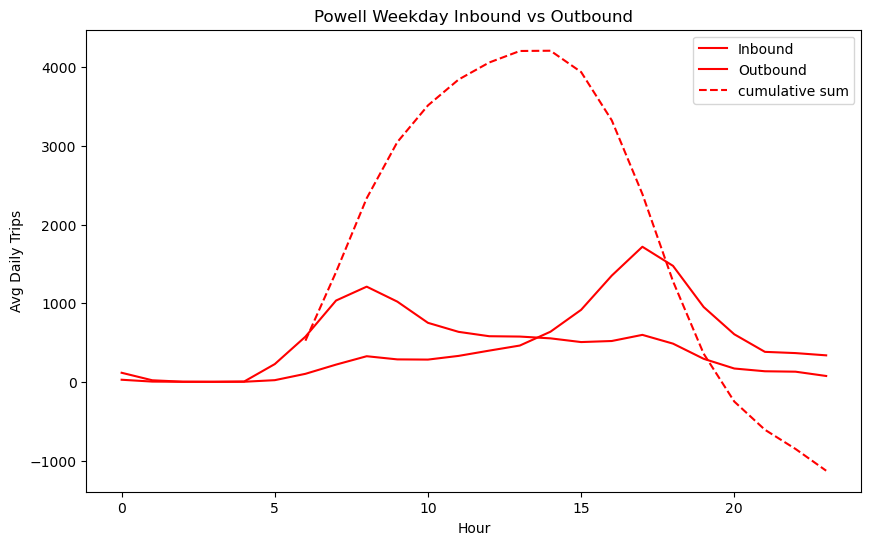

In [366]:
k = downtown_master[(downtown_master['Destination Station']=='POWL') & (downtown_master['Day Num']>4) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
j = downtown_master[(downtown_master['Origin Station']=='POWL') & (downtown_master['Day Num']>4) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
o = downtown_master[(downtown_master['Destination Station']=='POWL') & (downtown_master['Day Num']<5) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
p = downtown_master[(downtown_master['Origin Station']=='POWL') & (downtown_master['Day Num']<5) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)

ined_list = []
for i in list(zip(k['Trip Count'].loc[6:],-j['Trip Count'].loc[6:])):
    ined_list.extend(i)
int_list = []
for i in list(zip(o['Trip Count'].loc[6:],-p['Trip Count'].loc[6:])):
    int_list.extend(i)
ind_list= []
for i in range(0,36,2):
    ind_list.append((pd.Series(int_list).cumsum().to_list()[i]+ pd.Series(int_list).cumsum().to_list()[i+1])/2)
ineed_list = []
for i in range(0,36,2):
    ineed_list.append((pd.Series(ined_list).cumsum().to_list()[i]+ pd.Series(int_list).cumsum().to_list()[i+1])/2)

plt.figure(figsize=(10, 6))
plt.title('Powell Weekday Inbound vs Outbound')
plt.xlabel('Hour')
plt.ylabel('Avg Daily Trips')
# plt.plot(k['Hour'], k['Trip Count'], color = 'blue', label = 'Inbound')
# plt.plot(j['Hour'], j['Trip Count'], color = 'blue', label = 'Outbound')
plt.plot(o['Hour'], o['Trip Count'], color = 'red', label = 'Inbound')
plt.plot(p['Hour'], p['Trip Count'], color = 'red', label = 'Outbound')
# plt.plot(pd.Series(np.arange(6,24,1)), pd.Series(ineed_list), color = 'blue', linestyle = '--', label = 'cumulative sum')
plt.plot(pd.Series(np.arange(6,24,1)), pd.Series(ind_list), color = 'red', linestyle = '--', label = 'cumulative sum')
plt.legend()

plt.savefig("images/powell_hourly.svg")
plt.savefig("images/powell_hourly.png")

         

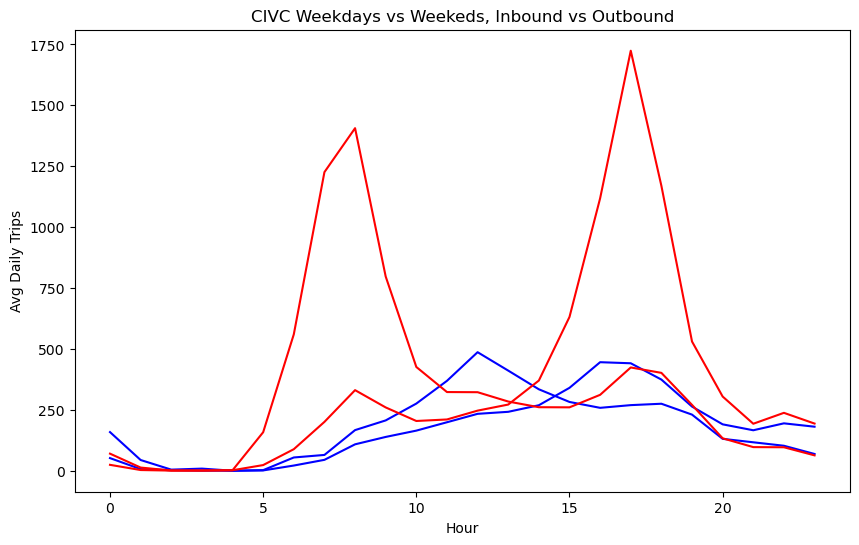

In [207]:
k = downtown_master[(downtown_master['Destination Station']=='CIVC') & (downtown_master['Day Num']>4) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
j = downtown_master[(downtown_master['Origin Station']=='CIVC') & (downtown_master['Day Num']>4) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
o = downtown_master[(downtown_master['Destination Station']=='CIVC') & (downtown_master['Day Num']<5) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
p = downtown_master[(downtown_master['Origin Station']=='CIVC') & (downtown_master['Day Num']<5) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)



plt.figure(figsize=(10, 6))
plt.title('CIVC Weekdays vs Weekeds, Inbound vs Outbound')
plt.xlabel('Hour')
plt.ylabel('Avg Daily Trips')
plt.plot(k['Hour'], k['Trip Count'], color = 'blue')
plt.plot(j['Hour'], j['Trip Count'], color = 'blue')
plt.plot(o['Hour'], o['Trip Count'], color = 'red')
plt.plot(p['Hour'], p['Trip Count'], color = 'red')
# plt.savefig("images/embr_hourly.svg")
# plt.savefig("images/embr_hourly.png")

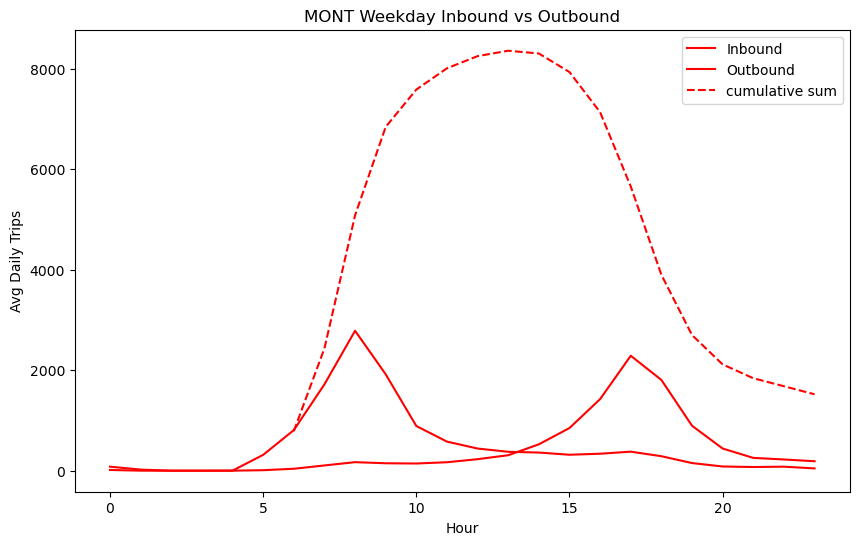

In [369]:
k = downtown_master[(downtown_master['Destination Station']=='MONT') & (downtown_master['Day Num']>4) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
j = downtown_master[(downtown_master['Origin Station']=='MONT') & (downtown_master['Day Num']>4) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
o = downtown_master[(downtown_master['Destination Station']=='MONT') & (downtown_master['Day Num']<5) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
p = downtown_master[(downtown_master['Origin Station']=='MONT') & (downtown_master['Day Num']<5) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)

ined_list = []
for i in list(zip(k['Trip Count'].loc[6:],-j['Trip Count'].loc[6:])):
    ined_list.extend(i)
int_list = []
for i in list(zip(o['Trip Count'].loc[6:],-p['Trip Count'].loc[6:])):
    int_list.extend(i)
ind_list= []
for i in range(0,36,2):
    ind_list.append((pd.Series(int_list).cumsum().to_list()[i]+ pd.Series(int_list).cumsum().to_list()[i+1])/2)
ineed_list = []
for i in range(0,36,2):
    ineed_list.append((pd.Series(ined_list).cumsum().to_list()[i]+ pd.Series(int_list).cumsum().to_list()[i+1])/2)

plt.figure(figsize=(10, 6))
plt.title('MONT Weekday Inbound vs Outbound')
plt.xlabel('Hour')
plt.ylabel('Avg Daily Trips')
# plt.plot(k['Hour'], k['Trip Count'], color = 'blue', label = 'Inbound')
# plt.plot(j['Hour'], j['Trip Count'], color = 'blue', label = 'Outbound')
plt.plot(o['Hour'], o['Trip Count'], color = 'red', label = 'Inbound')
plt.plot(p['Hour'], p['Trip Count'], color = 'red', label = 'Outbound')
# plt.plot(pd.Series(np.arange(6,24,1)), pd.Series(ineed_list), color = 'blue', linestyle = '--', label = 'cumulative sum')
plt.plot(pd.Series(np.arange(6,24,1)), pd.Series(ind_list), color = 'red', linestyle = '--', label = 'cumulative sum')
plt.legend()

plt.savefig("images/mont_cumsum_weekday.svg")
plt.savefig("images/mont_cumsum_weekday.png")


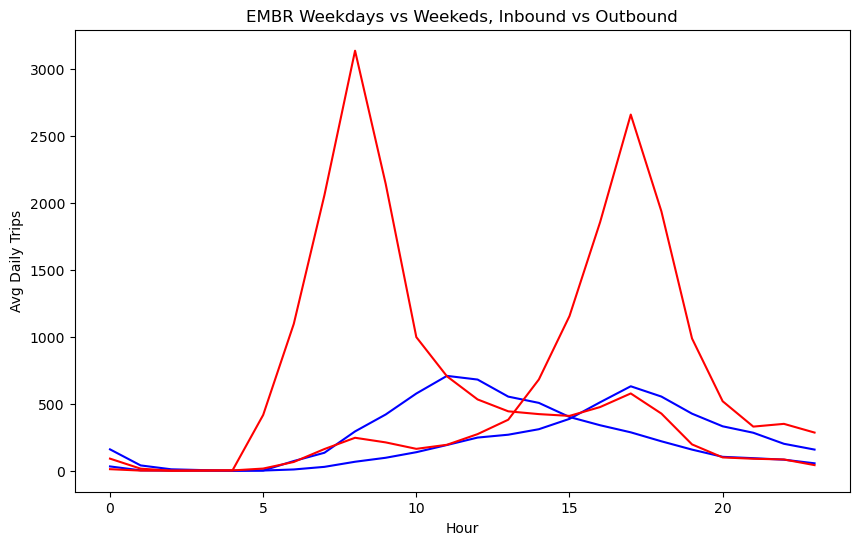

In [187]:
k = downtown_master[(downtown_master['Destination Station']=='EMBR') & (downtown_master['Day Num']>4) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
j = downtown_master[(downtown_master['Origin Station']=='EMBR') & (downtown_master['Day Num']>4) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
o = downtown_master[(downtown_master['Destination Station']=='EMBR') & (downtown_master['Day Num']<5) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)
p = downtown_master[(downtown_master['Origin Station']=='EMBR') & (downtown_master['Day Num']<5) & (downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Hour'])['Trip Count'].mean().reset_index()#.plot.line(x = trip)


plt.figure(figsize=(10, 6))
plt.title('EMBR Weekdays vs Weekeds, Inbound vs Outbound')
plt.xlabel('Hour')
plt.ylabel('Avg Daily Trips')
plt.plot(k['Hour'], k['Trip Count'], color = 'blue')
plt.plot(j['Hour'], j['Trip Count'], color = 'blue')
plt.plot(o['Hour'], o['Trip Count'], color = 'red')
plt.plot(p['Hour'], p['Trip Count'], color = 'red')
# plt.savefig("images/embr_hourly.svg")
# plt.savefig("images/embr_hourly.png")

In [176]:
# all_line2022 = px.line(all2[all2['Year']=='2022'], x="Hour", y="Trip Count", 
#                     color='Day', color_discrete_sequence=px.colors.qualitative.G10, facet_col = 'Station', 
#                        title = "2023 SF Downtown Hourly Ridership",width=900, height=350)
# all_line2022.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# all_line2022.update_layout(showlegend = False)
# all_line2022.show()
# all_line2022.write_image("images/all_line2022.png")
# all_line2022.write_html("images/all_line2022.html")
# all_line2022.write_image("images/all_line2022.svg")

all2[all2['Year']=='2022']

Year        Day  Hour  Trip Count Station Day Type
164  2022     Friday     0  134.057692    MONT  Weekday
165  2022     Friday     1   33.057692    MONT  Weekday
166  2022     Friday     2    2.535714    MONT  Weekday
167  2022     Friday     3    1.333333    MONT  Weekday
168  2022     Friday     4    5.200000    MONT  Weekday
..    ...        ...   ...         ...     ...      ...
331  2022  Wednesday    19  835.557692    CIVC  Weekday
332  2022  Wednesday    20  458.865385    CIVC  Weekday
333  2022  Wednesday    21  291.288462    CIVC  Weekday
334  2022  Wednesday    22  327.461538    CIVC  Weekday
335  2022  Wednesday    23  233.923077    CIVC  Weekday

[672 rows x 6 columns]

In [44]:
#Weekday percentage of total volume
day_2022_2019 = (all2.groupby(['Year','Station','Day'])['Trip Count'].sum()/\
all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index().groupby(['Year','Station'])['Trip Count'].sum()).reset_index()
day_2022_2019[day_2022_2019['Day'].isin(['Saturday','Sunday'])].groupby(['Year','Station'])['Trip Count'].sum()-1

Year  Station
2019  CIVC      -0.877795
      EMBR      -0.915964
      MONT      -0.936423
      POWL      -0.808490
2022  CIVC      -0.829520
      EMBR      -0.862456
      MONT      -0.884746
      POWL      -0.767681
Name: Trip Count, dtype: float64

In [42]:
#Powell weekend bounceback
all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()[(all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()\
['Station'] == 'POWL') & (all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()\
['Day'].isin(['Saturday','Sunday']))].groupby(['Year','Station'])['Trip Count'].sum().reset_index().loc[1,'Trip Count']/all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()[(all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()\
['Station'] == 'POWL') & (all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()\
['Day'].isin(['Saturday','Sunday']))].groupby(['Year','Station'])['Trip Count'].sum().reset_index().loc[0,'Trip Count']

0.5074835601996338